In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from statsmodels.tsa.stattools import acf
from rlxtools import kalman as rk

# create a sample signal

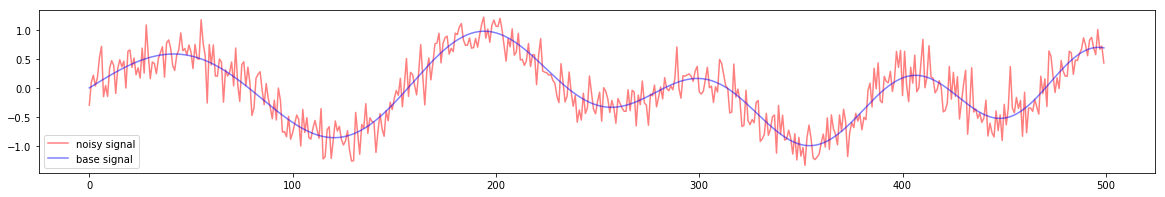

In [27]:
t = np.linspace(0,20,500)
plt.figure(figsize=(20,3))
noise = np.random.normal(scale=.5, size=t.shape)*.5
#noise = np.random.random(size=t.shape)-.5
s = np.sin(t)*np.cos(t**2/50-1)
x = s + noise
plt.plot(x, color="red",alpha=.5, label="noisy signal")
plt.plot(s, color="blue",alpha=.5, label="base signal")
plt.legend();

# estimate best covariance

In [5]:
cov_estimated = rk.estimate_kalman_covariance(x)   

# compute best covariance (knowing the noise factor)

In [6]:
cov_optimal =  rk.optimal_kalman_covariance(x, noise)   

In [7]:
cov_estimated, cov_optimal

(0.021897851788905645, 0.045639818408797717)

# visualize both minimum

A Jupyter Widget

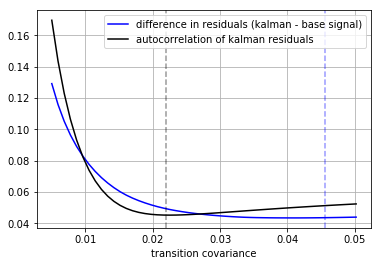

In [35]:
cvs = np.linspace(.005,np.max([cov_optimal, cov_estimated])*1.1,50)
cerrs, racorrs = [], []
for cv in tqdm(cvs):
    xk = rk.offline_kf(x, cov=cv)
    cerrs.append(np.mean(np.abs(x-xk - noise)))
    racorrs.append(np.linalg.norm(acf(x-xk,100)[1:]))
    
plt.plot(cvs, cerrs, color="blue", label="difference in residuals (kalman - base signal)")
plt.plot(cvs, np.r_[racorrs]/6, color="black", label="autocorrelation of kalman residuals")
plt.axvline(cov_optimal, color="blue", alpha=.4, ls="--")
plt.axvline(cov_estimated, color="black", alpha=.4, ls="--")
plt.legend();
plt.xlabel("transition covariance")
plt.grid()

# visualize effect of estimated covariance (offline and online)

0.0218978517889
0.0218978517889


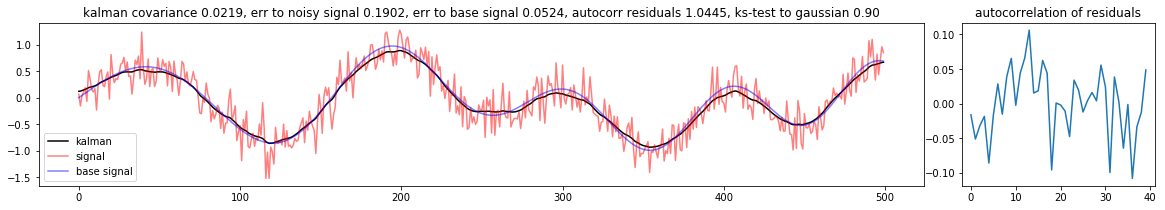

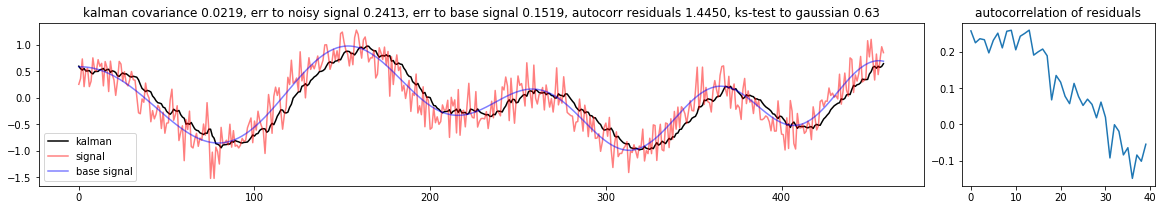

In [9]:
rk.plot_kalman(x, s, cov_estimated, kf_function=rk.offline_kf)
rk.plot_kalman(x, s, cov_estimated, kf_function=rk.online_kf)

# visualize effect of optimal covariance (offline and online)

0.0456398184088
0.0456398184088


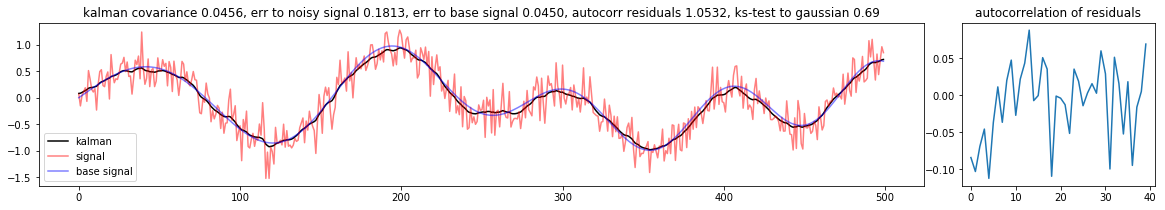

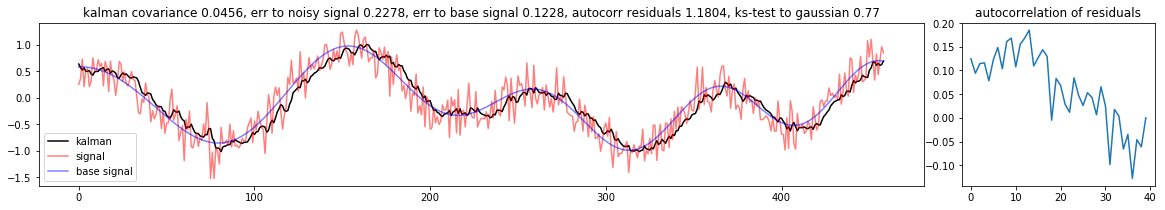

In [11]:
rk.plot_kalman(x, s, cov_optimal, kf_function=rk.offline_kf)
rk.plot_kalman(x, s, cov_optimal, kf_function=rk.online_kf)

# observe `pykalman` `em` function may produce similar estimations

but must calibrate the number of iterations

[[ 0.03247226]] [[1]] [[1]]
0.0324722624001


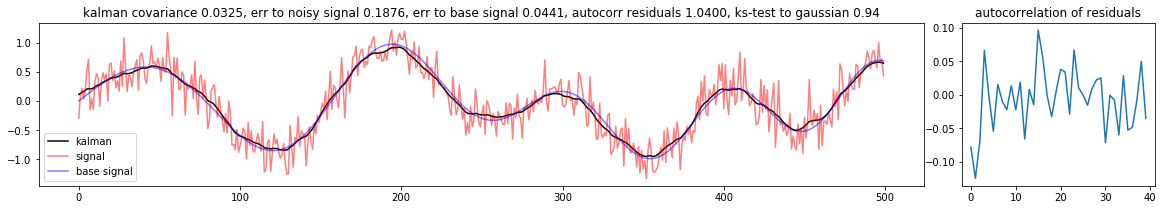

In [30]:
from pykalman import KalmanFilter
kf = KalmanFilter(transition_matrices=[[1]], transition_covariance=[[1]], observation_matrices=[[1]])
kf = kf.em(x, n_iter=8)
print kf.transition_covariance, kf.transition_matrices, kf.observation_matrices
rk.plot_kalman(x,s, cov=kf.transition_covariance[0][0], tm=kf.transition_matrices[0][0], om=kf.observation_matrices[0][0])

[[ 0.01055222]] [[1]] [[1]]
0.0105522158372


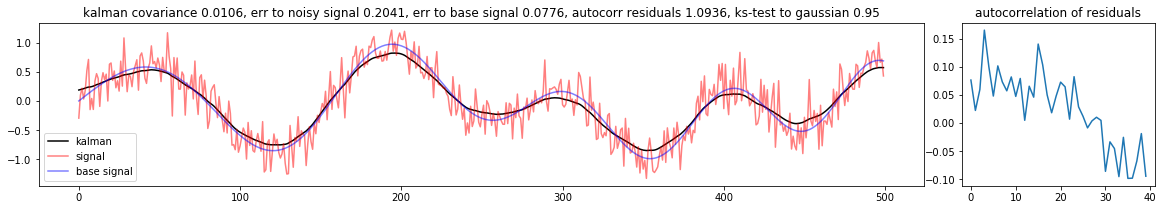

In [32]:
kf = KalmanFilter(transition_matrices=[[1]], transition_covariance=[[1]], observation_matrices=[[1]])
kf = kf.em(x, n_iter=20)
print kf.transition_covariance, kf.transition_matrices, kf.observation_matrices
rk.plot_kalman(x,s, cov=kf.transition_covariance[0][0], tm=kf.transition_matrices[0][0], om=kf.observation_matrices[0][0])

[[ 0.30784243]] [[1]] [[1]]
0.307842433725


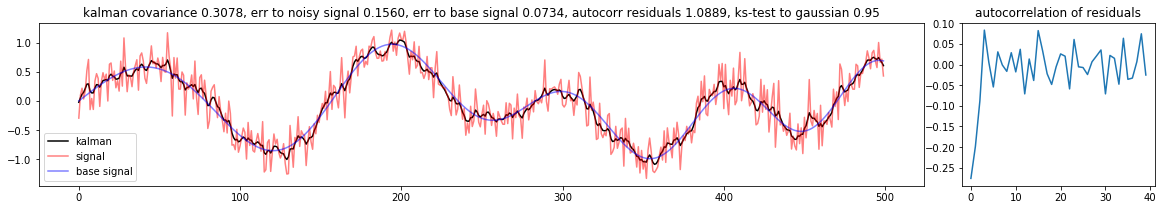

In [33]:
kf = KalmanFilter(transition_matrices=[[1]], transition_covariance=[[1]], observation_matrices=[[1]])
kf = kf.em(x, n_iter=2)
print kf.transition_covariance, kf.transition_matrices, kf.observation_matrices
rk.plot_kalman(x,s, cov=kf.transition_covariance[0][0], tm=kf.transition_matrices[0][0], om=kf.observation_matrices[0][0])

In [36]:
?rk.estimate_kalman_covariance